# Aim of this notebook
The goal of this note book is to automate the FAIR assesment of mutliple online resources through the [FAIR-Checker tool](https://fair-checker.france-bioinformatique.fr). 
All resulst are stored in a matrix and serialized into a CSV file. Scores can be interpreted as follows: 
 - 0 -> `failure`
 - 1 -> `weak` assesment
 - 2 -> `strong` assesment

To run this notebook you just need the `requests` and `pandas` python libraries. 

The FAIR-Checker API is better described at https://fair-checker.france-bioinformatique.fr/swagger 

Please report any issue at https://github.com/IFB-ElixirFr/fair-checker/issues or contact alban.gaignard@univ-nantes.fr. 

In [1]:
import time
import requests
import pandas as pd
from tqdm.notebook import tqdm

## Input dataset

In [2]:
#urls = ["http://bio.tools/bwa",
#        "https://workflowhub.eu/workflows/447",
#        "https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/HYPW4B", 
#        "https://tess.elixir-europe.org/materials/discover-drug-targets-with-europe-pmc-machine-learning-dataset-and-open-targets", 
#]

urls = [
    "https://bio.tools/nf-core-sarek", 
    "https://workflowhub.eu/workflows/521",
    "https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/SMVERV",
    "http://caligraph.org/.well-known/void",
    "https://www.bgee.org/sparql/",
    "https://raw.githubusercontent.com/BFO-ontology/BFO/master/bfo.owl",
    "https://raw.githubusercontent.com/Wimmics/CovidOnTheWeb/master/dataset/covidontheweb-definitions.ttl",
    "https://entrepot.recherche.data.gouv.fr/dataset.xhtml?persistentId=doi:10.57745/XHQ7TL",
    "https://www.uniprot.org/uniprotkb/P63000/entry",
    "https://rest.uniprot.org/uniprotkb/P63000",
    "https://zenodo.org/record/3950013",
]

In [3]:
FC_all_metrics_url = "https://fair-checker.france-bioinformatique.fr/api/check/metrics_all"
#FC_all_metrics_url = "http://localhost:5000/api/check/metrics_all"

## FAIR assesment over all inputs 

In [4]:
df = pd.DataFrame()
rows = []

for u in tqdm(urls):
    # call to the FC API
    start = time.time()
    res = requests.get(url=FC_all_metrics_url, params={"url": u})
    eval_in_sec = time.time() - start
    
    evaluations = res.json()
    row = {"URL": u}    
    print(u)

    if type(evaluations) == list :
        # iterating over all evaluation results
        for e in evaluations:
            #print(e)
            row[e["metric"]] = int(e["score"])
        row["duration (s)"] = round(eval_in_sec, 2)
        print(row)
    rows.append(row)

  0%|          | 0/11 [00:00<?, ?it/s]

https://bio.tools/nf-core-sarek
{'URL': 'https://bio.tools/nf-core-sarek', 'F1A': 2, 'F1B': 2, 'F2A': 1, 'F2B': 1, 'A1.1': 2, 'A1.2': 0, 'I1': 1, 'I2': 1, 'I3': 2, 'R1.1': 0, 'R1.2': 2, 'R1.3': 1, 'duration (s)': 39.0}
https://workflowhub.eu/workflows/521
{'URL': 'https://workflowhub.eu/workflows/521', 'F1A': 2, 'F1B': 2, 'F2A': 1, 'F2B': 1, 'A1.1': 2, 'A1.2': 2, 'I1': 1, 'I2': 1, 'I3': 2, 'R1.1': 2, 'R1.2': 0, 'R1.3': 1, 'duration (s)': 39.53}
https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/SMVERV
{'URL': 'https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/SMVERV', 'F1A': 2, 'F1B': 2, 'F2A': 1, 'F2B': 2, 'A1.1': 2, 'A1.2': 2, 'I1': 1, 'I2': 2, 'I3': 2, 'R1.1': 2, 'R1.2': 2, 'R1.3': 2, 'duration (s)': 36.24}
http://caligraph.org/.well-known/void
{'URL': 'http://caligraph.org/.well-known/void', 'F1A': 2, 'F1B': 0, 'F2A': 1, 'F2B': 2, 'A1.1': 2, 'A1.2': 2, 'I1': 1, 'I2': 2, 'I3': 2, 'R1.1': 2, 'R1.2': 2, 'R1.3': 2, 'duration (s)': 29.49}
htt

## Evaluation matrix

In [68]:
from IPython.display import display, Markdown
df = pd.DataFrame.from_records(rows)
md = df.to_markdown()
display(Markdown(md))

|    | URL                                                                                                  |   F1A |   F1B |   F2A |   F2B |   A1.1 |   A1.2 |   I1 |   I2 |   I3 |   R1.1 |   R1.2 |   R1.3 |   duration (s) |
|---:|:-----------------------------------------------------------------------------------------------------|------:|------:|------:|------:|-------:|-------:|-----:|-----:|-----:|-------:|-------:|-------:|---------------:|
|  0 | https://bio.tools/nf-core-sarek                                                                      |     2 |     2 |     1 |     1 |      2 |      0 |    1 |    1 |    2 |      0 |      2 |      1 |           3.18 |
|  1 | https://workflowhub.eu/workflows/521                                                                 |     2 |     2 |     1 |     1 |      2 |      2 |    1 |    1 |    2 |      2 |      0 |      1 |           4.52 |
|  2 | https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/SMVERV                      |     2 |     2 |     1 |     2 |      2 |      2 |    1 |    2 |    2 |      2 |      2 |      2 |           8.58 |
|  3 | http://caligraph.org/.well-known/void                                                                |     2 |     0 |     1 |     2 |      2 |      2 |    1 |    2 |    2 |      2 |      2 |      2 |           1.02 |
|  4 | https://www.bgee.org/sparql/                                                                         |     2 |     0 |     1 |     1 |      2 |      0 |    1 |    1 |    0 |      0 |      0 |      1 |           2.56 |
|  5 | https://raw.githubusercontent.com/BFO-ontology/BFO/master/bfo.owl                                    |     2 |     0 |     1 |     2 |      2 |      0 |    1 |    2 |    0 |      0 |      0 |      2 |           1.22 |
|  6 | https://raw.githubusercontent.com/Wimmics/CovidOnTheWeb/master/dataset/covidontheweb-definitions.ttl |     2 |     0 |     2 |     2 |      2 |      0 |    2 |    2 |    2 |      0 |      0 |      2 |           1.05 |
|  7 | https://entrepot.recherche.data.gouv.fr/dataset.xhtml?persistentId=doi:10.57745/XHQ7TL               |     2 |     2 |     1 |     2 |      2 |      2 |    1 |    2 |    2 |      2 |      2 |      2 |           9.6  |
|  8 | https://www.uniprot.org/uniprotkb/P63000/entry                                                       |     2 |     0 |     1 |     1 |      2 |      0 |    1 |    1 |    0 |      0 |      0 |      1 |           3.9  |
|  9 | https://rest.uniprot.org/uniprotkb/P63000                                                            |     2 |     0 |     0 |     0 |      2 |      0 |    0 |    0 |    0 |      0 |      0 |      0 |           2.56 |
| 10 | https://zenodo.org/record/3950013                                                                    |     2 |     2 |     1 |     2 |      2 |      2 |    1 |    2 |    2 |      2 |      2 |      2 |           3.78 |

In [69]:
df.to_csv("fc_evals.csv")

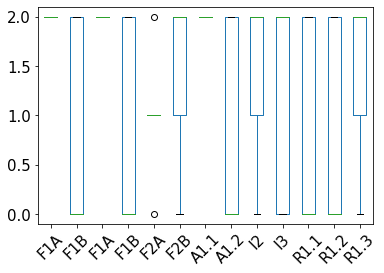

In [70]:
plot = df[["F1A", "F1B", "F1A", "F1B", "F2A", "F2B", "A1.1", "A1.2", "I2", "I3", "R1.1", "R1.2", "R1.3"]].boxplot(grid=False, rot=45, fontsize=15)